# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beau vallon
Processing Record 2 of Set 1 | eufaula
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | lake norman of catawba
Processing Record 6 of Set 1 | talara
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | salinopolis
Processing Record 13 of Set 1 | rabigh
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | gracemere
Processing Record 18 of Set 1 | alotau
City not found. Skipping...
Processing Record 19 of Set 1 | mossel bay
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | chibougamau
Processing Record 22 of 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beau vallon,-20.4189,57.6953,22.13,94,20,1.54,MU,1698027053
1,eufaula,31.8913,-85.1455,17.37,83,0,0.00,US,1698027026
2,adamstown,-25.0660,-130.1015,23.30,78,37,4.69,PN,1698026890
3,invercargill,-46.4000,168.3500,15.57,66,99,3.58,NZ,1698026889
4,lake norman of catawba,35.5804,-81.0165,11.86,76,0,1.54,US,1698027054


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beau vallon,-20.4189,57.6953,22.13,94,20,1.54,MU,1698027053
1,eufaula,31.8913,-85.1455,17.37,83,0,0.00,US,1698027026
2,adamstown,-25.0660,-130.1015,23.30,78,37,4.69,PN,1698026890
3,invercargill,-46.4000,168.3500,15.57,66,99,3.58,NZ,1698026889
4,lake norman of catawba,35.5804,-81.0165,11.86,76,0,1.54,US,1698027054


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

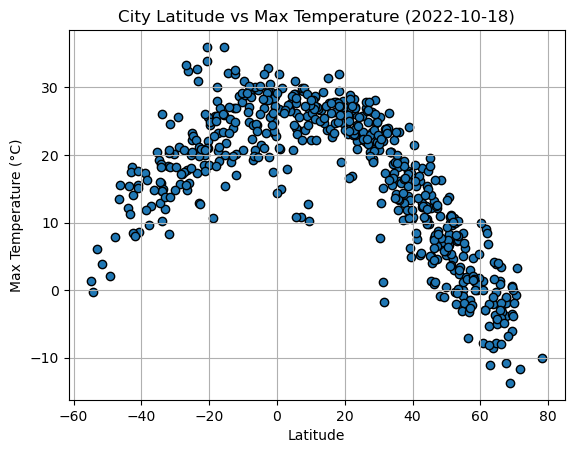

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

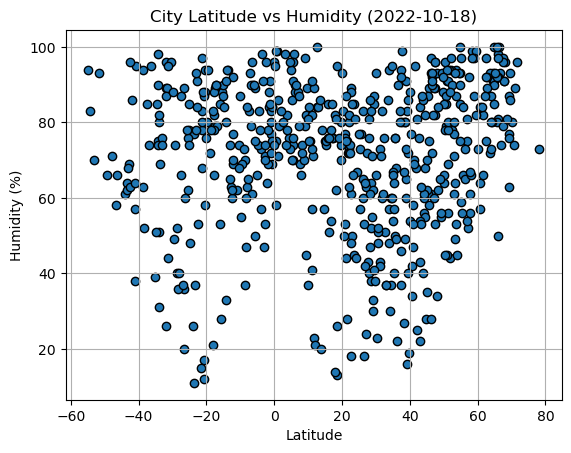

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

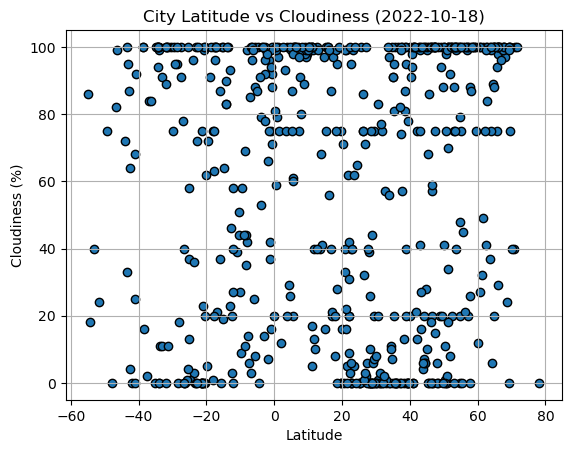

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

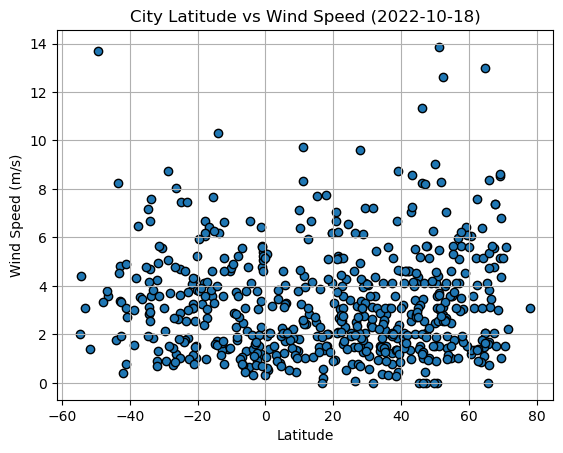

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, x_label, y_label, a, b):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Calculate Linear regression
    regression_line = slope * x + intercept
    print(f'r-value is: {r_value}')

    # Graficar los datos y la línea de regresión
    plt.scatter(x, y)
    plt.plot(x, regression_line, color='red', label='Linear Regression')
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (a, b), ha='center', color='red', fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,eufaula,31.8913,-85.1455,17.37,83,0,0.00,US,1698027026
4,lake norman of catawba,35.5804,-81.0165,11.86,76,0,1.54,US,1698027054
6,isafjordur,66.0755,-23.1240,3.45,81,98,1.68,IS,1698027055
7,constantia,44.1833,28.6500,15.38,56,7,3.44,RO,1698027056
9,iqaluit,63.7506,-68.5145,-8.50,72,37,0.89,CA,1698027056


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beau vallon,-20.4189,57.6953,22.13,94,20,1.54,MU,1698027053
2,adamstown,-25.0660,-130.1015,23.30,78,37,4.69,PN,1698026890
3,invercargill,-46.4000,168.3500,15.57,66,99,3.58,NZ,1698026889
5,talara,-4.5772,-81.2719,21.42,83,0,6.69,PE,1698027055
8,karratha,-20.7377,116.8463,35.91,17,99,4.27,AU,1698027056


###  Temperature vs. Latitude Linear Regression Plot

r-value is: -0.8820939797607721


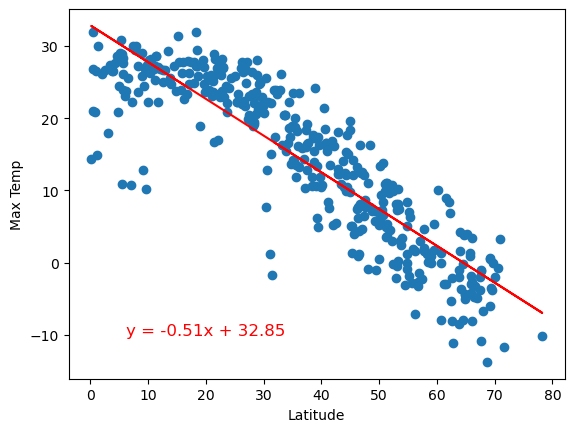

In [80]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', 20, -10)

r-value is: 0.7313843029843609


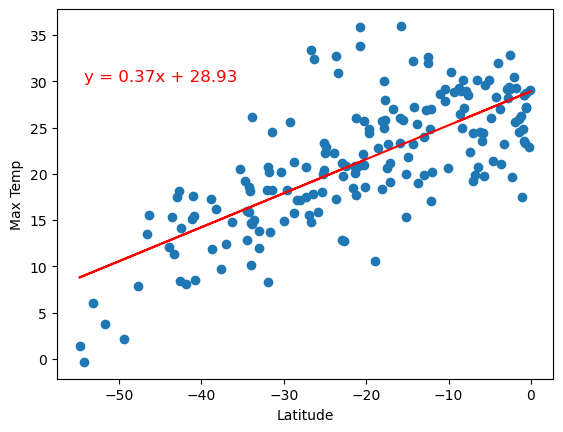

In [81]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', -45, 30)

**Discussion about the linear relationship:** There is definitely a greater correlation between latitude and maximum temperature on the northern side of the hemisphere. We can see that the data are closer to each other. The correlation value is close to 90% which is great. On the southern side of the hemisphere the data are more separated from each other. In this case the correlation is positive, since as latitude increases, temperature increases. Correlation is close to 75% in this case, wich is not bad but not great to make predictions.

### Humidity vs. Latitude Linear Regression Plot

r-value is: 0.15687634528442482


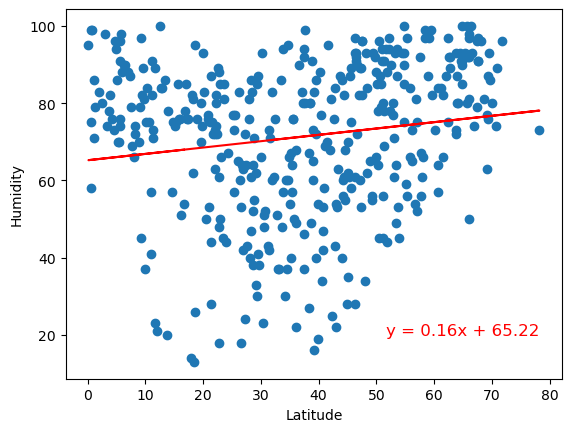

In [83]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 65, 20)

r-value is: 0.10279136941499939


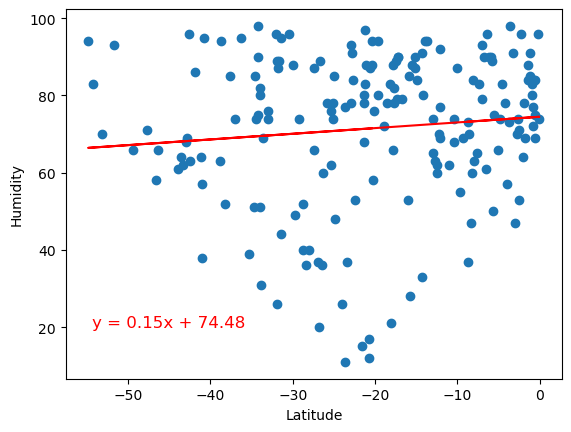

In [89]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', -45, 20)

**Discussion about the linear relationship:** In general, we can see data is so spreadout and we can conclude there is no correlation between latitude and humidity, no matter if its northern or southern hermisphere.

### Cloudiness vs. Latitude Linear Regression Plot

r-value is: 0.0818413720593741


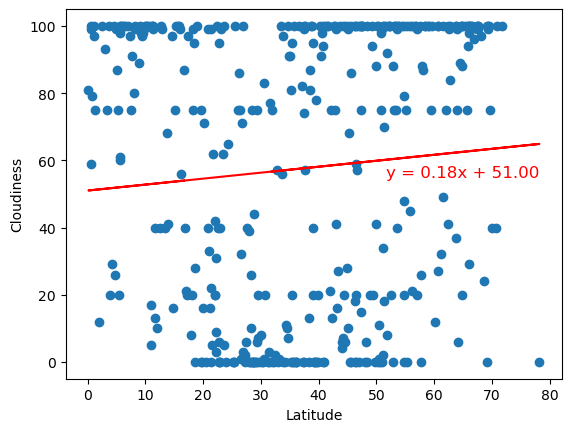

In [84]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 65, 55)

r-value is: 0.0713676429498279


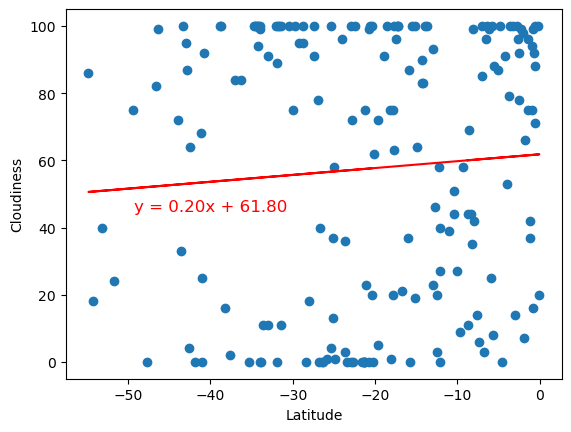

In [90]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', -40, 45)

**Discussion about the linear relationship:** As same as the previous plots, there is no correlation between latitude and cloudiness. In both cases our r_value is less than 10%. We can conclude linnear regression is not a helpful tool in this scenario if we would like to make predictions about cloudiness. Anyway, one particular thing we can see is the largest of the data is between only the maximum and minimum percentage values of cloudiness. In other words, most of the cities are completely cloudy or not cloudy at all in the northest hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

r-value is: 0.16879568484955498


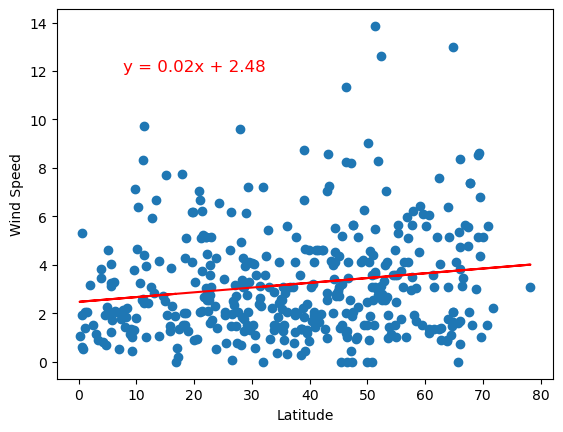

In [87]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 20, 12)

r-value is: -0.1329016140123469


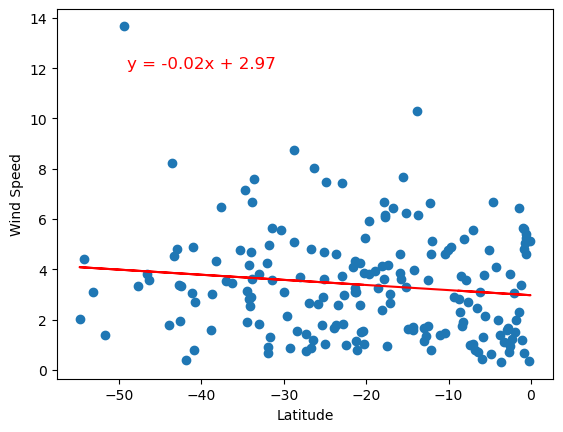

In [88]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', -40, 12)

**Discussion about the linear relationship:** Data is so spredout that there is no possible correlation between wind speed and latitude. But, as this is the last plot, we can conclude in all of them the northest hemisphere data has more correlation between latitude and the different factors. If we would like to make predictions on something in particular, we would like to analyze the max temperature and latitude. For the rest, we should use different tools than linnear regression.